# SPOT Kriging in 10 Dimensions: Nyström Approximation vs. Exact (Michalewicz Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 10-dimensional Michalewicz function.

We use a maximum of 300 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 10D Michalewicz Function

In [2]:
# do not change, these are given by the organizers
dim = 10
lower = np.full(dim, 0)
upper = np.full(dim, np.pi)
fun = Analytical().fun_michalewicz
fun_evals = 300
max_time =  60

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = 20
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-6
seed = 321
max_surrogate_points = 10
min_Lambda = -1
max_Lambda = 1
min_theta = -4
max_theta = 3
isotropic = True

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_03_00_08_33_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-08-33 for SummaryWriter()


spotpython tuning: -2.5474984778405236 [#---------] 7.00% 
spotpython tuning: -2.547678678892986 [#---------] 7.33% 
spotpython tuning: -2.547678678892986 [#---------] 7.67% 
spotpython tuning: -2.548196479326773 [#---------] 8.00% 
spotpython tuning: -2.557777843091351 [#---------] 8.33% 
spotpython tuning: -2.557777843091351 [#---------] 8.67% 
spotpython tuning: -2.5580710557399153 [#---------] 9.00% 
spotpython tuning: -2.561612943261404 [#---------] 9.33% 
spotpython tuning: -2.561612943261404 [#---------] 9.67% 
spotpython tuning: -2.561612943261404 [#---------] 10.00% 
spotpython tuning: -2.561612943261404 [#---------] 10.33% 
spotpython tuning: -2.561612943261404 [#---------] 10.67% 
spotpython tuning: -2.561612943261404 [#---------] 11.00% 
spotpython tuning: -2.561612943261404 [#---------] 11.33% 
spotpython tuning: -2.561612943261404 [#---------] 11.67% 
spotpython tuning: -2.561612943261404 [#---------] 12.00% 
spotpython tuning: -3.421368769006982 [#---------] 12.33% 
spot

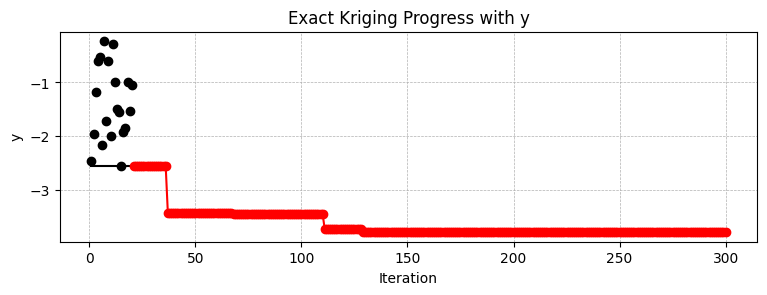

In [5]:
try:
    spot_exact_y = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_y.run()
    exact_success_y = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_y = False
if exact_success_y:
    spot_exact_y.plot_progress(log_y=False, title="Exact Kriging Progress with y")

## Regression  and  Expected Improvement as Infill Criterion

In [6]:
infill_criterion = "ei"

In [7]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method,min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-09-46 for SummaryWriter()


spotpython tuning: -2.5474984778405236 [#---------] 7.00% 
spotpython tuning: -2.5474984778405236 [#---------] 7.33% 
spotpython tuning: -2.5474984778405236 [#---------] 7.67% 
spotpython tuning: -2.7011137649822254 [#---------] 8.00% 
spotpython tuning: -2.7011137649822254 [#---------] 8.33% 
spotpython tuning: -2.7011137649822254 [#---------] 8.67% 
spotpython tuning: -2.7011137649822254 [#---------] 9.00% 
spotpython tuning: -2.7011137649822254 [#---------] 9.33% 
spotpython tuning: -2.7011137649822254 [#---------] 9.67% 
spotpython tuning: -2.7011137649822254 [#---------] 10.00% 
spotpython tuning: -2.7011137649822254 [#---------] 10.33% 
spotpython tuning: -2.7011137649822254 [#---------] 10.67% 
spotpython tuning: -2.7011137649822254 [#---------] 11.00% 
spotpython tuning: -2.7011137649822254 [#---------] 11.33% 
spotpython tuning: -2.7011137649822254 [#---------] 11.67% 
spotpython tuning: -2.7011137649822254 [#---------] 12.00% 
spotpython tuning: -2.7304472687722035 [#--------

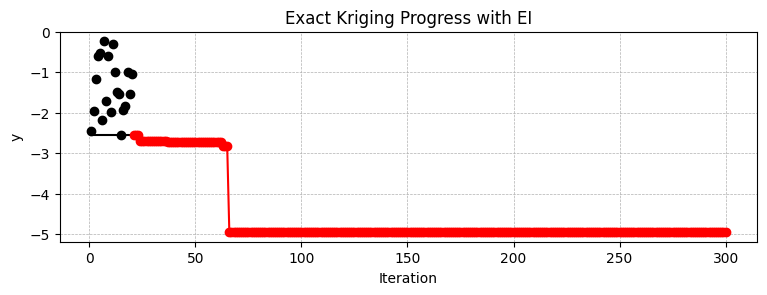

In [8]:
try:
    spot_exact_ei = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_ei.run()
    exact_success_ei = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_ei = False
if exact_success_ei:
    spot_exact_ei.plot_progress(log_y=False, title="Exact Kriging Progress with EI")

## Regression and y with Nyström Kriging

In [16]:
use_nystrom = True
nystrom_m = 100
infill_criterion = "y"

In [17]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-16-25 for SummaryWriter()


spotpython tuning: -2.5474984778405236 [#---------] 7.00% 
spotpython tuning: -2.5474984778405236 [#---------] 7.33% 


spotpython tuning: -2.5474984778405236 [#---------] 7.67% 
spotpython tuning: -2.5474984778405236 [#---------] 8.00% 
spotpython tuning: -2.5474984778405236 [#---------] 8.33% 
spotpython tuning: -2.5474984778405236 [#---------] 8.67% 
spotpython tuning: -2.5474984778405236 [#---------] 9.00% 
spotpython tuning: -2.5474984778405236 [#---------] 9.33% 
spotpython tuning: -2.5474984778405236 [#---------] 9.67% 
spotpython tuning: -2.9059861427247067 [#---------] 10.00% 
spotpython tuning: -2.9059861427247067 [#---------] 10.33% 
spotpython tuning: -2.9059861427247067 [#---------] 10.67% 
spotpython tuning: -2.9059861427247067 [#---------] 11.00% 
spotpython tuning: -2.9059861427247067 [#---------] 11.33% 
spotpython tuning: -2.9059861427247067 [#---------] 11.67% 
spotpython tuning: -2.9059861427247067 [#---------] 12.00% 
spotpython tuning: -2.9059861427247067 [#---------] 12.33% 
spotpython tuning: -2.9059861427247067 [#---------] 12.67% 
spotpython tuning: -2.9059861427247067 [#------

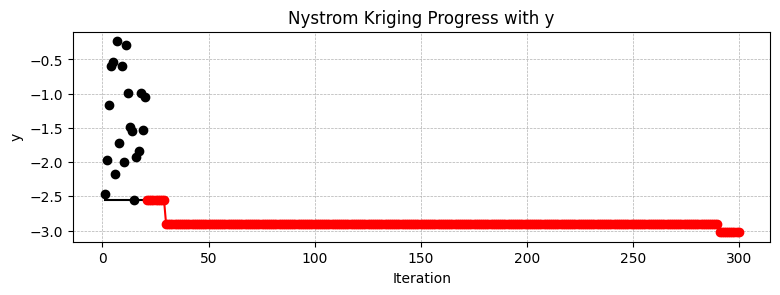

In [18]:
spot_nystrom_y = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_y.run()
spot_nystrom_y.plot_progress(log_y=False, title="Nystrom Kriging Progress with y")

## Regression and ei with Nyström Kriging

In [19]:
infill_criterion = "ei"

In [20]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=max_time,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-17-16 for SummaryWriter()


spotpython tuning: -2.5474984778405236 [#---------] 7.00% 
spotpython tuning: -2.5474984778405236 [#---------] 7.33% 
spotpython tuning: -2.5474984778405236 [#---------] 7.67% 
spotpython tuning: -2.5474984778405236 [#---------] 8.00% 
spotpython tuning: -2.5474984778405236 [#---------] 8.33% 
spotpython tuning: -2.5474984778405236 [#---------] 8.67% 
spotpython tuning: -2.5474984778405236 [#---------] 9.00% 
spotpython tuning: -2.5474984778405236 [#---------] 9.33% 
spotpython tuning: -2.5474984778405236 [#---------] 9.67% 
spotpython tuning: -2.9059861427247067 [#---------] 10.00% 
spotpython tuning: -2.9059861427247067 [#---------] 10.33% 
spotpython tuning: -2.9059861427247067 [#---------] 10.67% 
spotpython tuning: -2.9059861427247067 [#---------] 11.00% 
spotpython tuning: -2.9059861427247067 [#---------] 11.33% 
spotpython tuning: -2.9059861427247067 [#---------] 11.67% 
spotpython tuning: -2.9059861427247067 [#---------] 12.00% 
spotpython tuning: -2.9059861427247067 [#--------

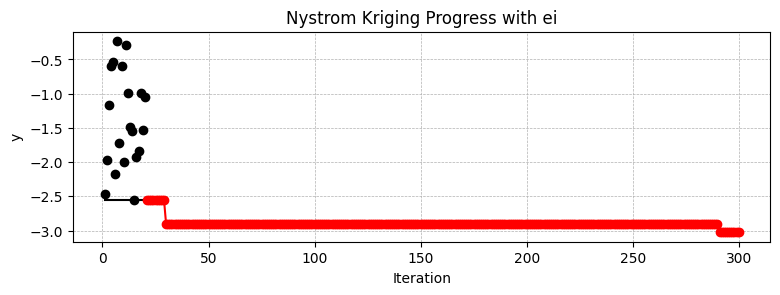

In [21]:
spot_nystrom_ei = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_ei.run()
spot_nystrom_ei.plot_progress(log_y=False, title="Nystrom Kriging Progress with ei")

## Compare Minimum Found

In [22]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_y.min_y:.4f} at x = {spot_exact_y.min_X}")
print(f"[6D] Exact Kriging ei: min y = {spot_exact_ei.min_y:.4f} at x = {spot_exact_ei.min_X}")
print(f"[6D] Nyström Kriging y: min y = {spot_nystrom_y.min_y:.4f} at x = {spot_nystrom_y.min_X}")
print(f"[6D] Nyström Kriging ei: min y = {spot_nystrom_ei.min_y:.4f} at x = {spot_nystrom_ei.min_X}")

[6D] Exact Kriging y: min y = -3.7862 at x = [1.65766468 1.6523692  2.55075618 0.63887564 1.69859974 0.79604682
 0.60415951 0.90475249 1.28261561 1.57602964]
[6D] Exact Kriging ei: min y = -4.9545 at x = [1.01709401 1.67952035 2.21249161 1.12741185 1.71245671 1.40149012
 0.76618967 1.10748964 1.27785735 1.59960521]
[6D] Nyström Kriging y: min y = -3.0236 at x = [0.89159529 0.60820214 2.13310205 2.98553921 1.69236814 1.00288805
 2.89918194 1.94166689 1.66716018 2.10732399]
[6D] Nyström Kriging ei: min y = -3.0236 at x = [0.89159529 0.60820214 2.13310205 2.98553921 1.69236814 1.00288805
 2.89918194 1.94166689 1.66716018 2.10732399]
